In [35]:
import numpy as np
import pandas as pd

from nltk.tokenize import sent_tokenize
import nltk
from sklearn.linear_model import LinearRegression
from sklearn.metrics import auc, roc_curve, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib as plt

In [36]:
train = pd.read_csv("../input/commonlitreadabilityprize/train.csv")
test = pd.read_csv("../input/commonlitreadabilityprize/test.csv")

In [37]:
train.shape, test.shape

((2834, 6), (7, 4))

In [38]:
train

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,"When the young people returned to the ballroom, it presented a decidedly changed appearance. Instead of an interior scene, it was a winter landscape.\nThe floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field. The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cot...",-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewhat silent, her eyes resting on Dolly with a wistful, uncertain expression. She wanted to give the child the pleasure she craved, but she had hard work to bring herself to the point of overcoming her own objections.\nAt last, however, when the meal was nearly over, she smiled at her little daughter, and said, ""All right, Dolly, you may go.""\n""Oh, mo...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as quickly as it came, and two days after their sleigh ride there was scarcely a vestige of white on the ground. Tennis was again possible and a great game was in progress on the court at Pine Laurel. Patty and Roger were playing against Elise and Sam Blaney, and the pairs were well matched.\nBut the long-contested victory finally went against Patty, a...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,"And outside before the palace a great garden was walled round, filled full of stately fruit-trees, gray olives and sweet figs, and pomegranates, pears, and apples, which bore the whole year round. For the rich south-west wind fed them, till pear grew ripe on pear, fig on fig, and grape on grape, all the winter and the spring. And at the farther end gay flower-beds bloomed through all seasons o...",-1.054013,0.450007
4,37c1b32fb,NaN,NaN,"Once upon a time there were Three Bears who lived together in a house of their own in a wood. One of them was a Little, Small, Wee Bear; and one was a Middle-sized Bear, and the other was a Great, Huge Bear. They had each a pot for their porridge; a little pot for the Little, Small, Wee Bear; and a middle-sized pot for the Middle Bear; and a great pot for the Great, Huge Bear. And they had eac...",0.247197,0.510845
...,...,...,...,...,...,...
2829,25ca8f498,https://sites.ehe.osu.edu/beyondpenguins/files/2011/06/dinosaurs_45_text.pdf,CC BY-SA 3.0,"When you think of dinosaurs and where they lived, what do you picture? Do you see hot, steamy swamps, thick jungles, or sunny plains? Dinosaurs lived in those places, yes. But did you know that some dinosaurs lived in the cold and the darkness near the North and South Poles?\nThis surprised scientists, too. Paleontologists used to believe that dinosaurs lived only in the warmest parts of the w...",1.711390,0.646900
2830,2c26db523,https://en.wikibooks.org/wiki/Wikijunior:The_Elements/Solids,CC BY-SA 3.0,"So what is a solid? Solids are usually hard because their molecules have been packed together. The closer your molecules are, the harder you are. Solids also can hold their own shape. A rock will always look like a rock unless something happens to it. The same goes for a diamond. Even when you grind up a solid into a powder, you will see tiny little pieces of that solid under a microscope. Liq...",0.189476,0.535648
2831,cd19e2350,https://en.wikibooks.org/wiki/Wikijunior:The_Elements/Liquids,CC BY-SA 3.0,The second state of matter we will discuss is a liquid. Solids are hard things you can hold. Gases are floating around you and in bubbles. What is a liquid? Water is a liquid. Your blood is a liquid. Liquids are an in-between state of matter. They can be found in between the solid and gas states. They don't have to be made up of the same compounds. If you have a variety of materials in a liqui...,0.255209,0.483866
2832,15e2e9e7a,https://en.wikibooks.org/wiki/Geometry_for_Elementary_School/Solids,CC BY-SA 3.0,"Solids are shapes that you can actually touch. They have three dimensions,

In [39]:
# number of words in a text
train['wordCount'] = [len(i) for i in train['excerpt']]
test['wordCount'] = [len(i) for i in test['excerpt']]

In [40]:
train.describe()

,target,standard_error,wordCount
count,2834.000000,2834.000000,2834.000000
mean,-0.959319,0.491435,971.732886
std,1.033579,0.034818,117.257578
min,-3.676268,0.000000,669.000000
25%,-1.690320,0.468543,885.000000
50%,-0.912190,0.484721,971.000000
75%,-0.202540,0.506268,1058.000000
max,1.711390,0.649671,1341.000000


In [41]:
# OLD WORD LENGTH
def tokenize(texts):
    vec = CountVectorizer()
    result = vec.fit_transform(texts)
    vocab = np.array(vec.get_feature_names())
    return [vocab[result[i].indices] for i in range(result.shape[0])]
# average word length of words in a text
def wordLengthOld(texts):
    wordList = tokenize(texts)
    return [np.mean([len(word) for word in sublist]) for sublist in wordList]

In [42]:
# NEW WORD LENGTH
def wordLength(texts):
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    wordList = [tokenizer.tokenize(txt) for txt in texts]
    return [np.mean([len(word) for word in sublist]) for sublist in wordList]

<AxesSubplot:xlabel='target', ylabel='wordLength'>

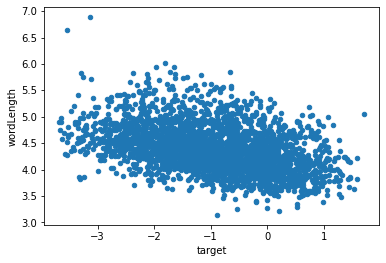

In [43]:
train['wordLength'] = wordLength(train["excerpt"])
test['wordLength'] = wordLength(test["excerpt"])
train.plot.scatter('target', 'wordLength')

In [44]:
# SENTENCE LENGTH
def sentenceLength(texts):
    sentenceList = [sent_tokenize(txt) for txt in texts]
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    return [np.mean([len(tokenizer.tokenize(txt)) for txt in sublist]) for sublist in sentenceList]

def sentenceCount(texts):
    sentenceList = [sent_tokenize(txt) for txt in texts]
    return [(len(txt)) for txt in sentenceList]

<AxesSubplot:xlabel='target', ylabel='sentenceLength'>

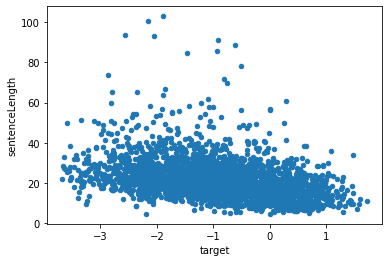

In [45]:
train['sentenceLength'] = sentenceLength(train["excerpt"])
test['sentenceLength'] = sentenceLength(test["excerpt"])
train.plot.scatter('target', 'sentenceLength')

<AxesSubplot:xlabel='target', ylabel='sentenceCount'>

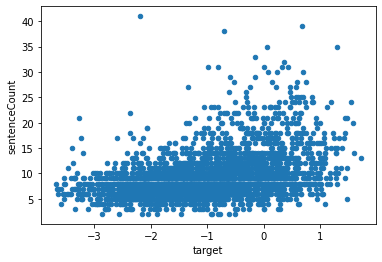

In [46]:
train['sentenceCount'] = sentenceCount(train["excerpt"])
test['sentenceCount'] = sentenceCount(test["excerpt"])
train.plot.scatter('target', 'sentenceCount')

In [47]:
def syllables(texts):
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    wordList = [tokenizer.tokenize(txt) for txt in texts]
    return [np.mean([_syllables(word) for word in sublist]) for sublist in wordList]
    
def _syllables(word):
    syllable_count = 0
    vowels = 'aeiouy'
    if word[0] in vowels:
        syllable_count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            syllable_count += 1
    if word.endswith('e'):
        syllable_count -= 1
    if word.endswith('le') and len(word) > 2 and word[-3] not in vowels:
        syllable_count += 1
    if syllable_count == 0:
        syllable_count += 1
    return syllable_count

<AxesSubplot:xlabel='target', ylabel='syllables'>

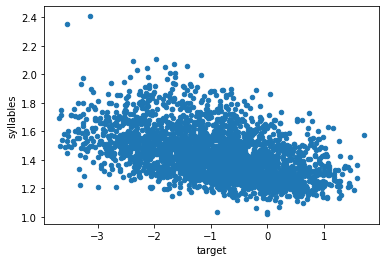

In [48]:
train['syllables'] = syllables(train["excerpt"])
test['syllables'] = syllables(test["excerpt"])
train.plot.scatter('target', 'syllables')

#### Stats based method

In [49]:
model_lr = LinearRegression()
model_lr.fit(train[["wordCount", "wordLength", "sentenceLength", "sentenceCount", "syllables"]],train["target"])
p_lr = model_lr.predict(train[["wordCount", "wordLength", "sentenceLength", "sentenceCount", "syllables"]])

In [50]:
mean_squared_error(train["target"], p_lr)

0.688864308006521

#### Stats based method with xgboost

In [51]:
import xgboost as xgb
from xgboost import XGBRegressor

In [52]:
X_stats = train[["wordCount", "wordLength", "sentenceLength", "sentenceCount", "syllables"]]
y = train["target"]
model_stats = XGBRegressor(objective = "reg:squarederror", max_depth=10, n_estimators=100)
model_stats.fit(X_stats, y)
p_stats = model_stats.predict(X_stats)

In [53]:
mean_squared_error(train["target"], p_stats)

0.0043077603210383356

#### Ensemble xgboost and logistic regression

In [54]:
# p_stats_test = model_stats.predict(test[["wordCount", "wordLength", "sentenceLength", "sentenceCount", "syllables"]])
# p_lr_test = model_lr.predict(test[["wordCount", "wordLength", "sentenceLength", "sentenceCount", "syllables"]])
# test["target"] = .7 * p_lr_test + .3 * p_stats_test
# test[["id", "target"]].to_csv("submission.csv", index=False)

#### Word2Vec with xgboost

In [55]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [56]:
embeddings = np.array([nlp(text).vector for text in train["excerpt"]])

In [57]:
X_w2v = embeddings
y = train["target"]
model_w2v = XGBRegressor(objective = "reg:squarederror", max_depth=10, n_estimators=100)
model_w2v.fit(X_w2v, y)
p_w2v = model_w2v.predict(X_w2v)

In [58]:
mean_squared_error(train["target"], p_w2v)

1.594307999228679e-07

#### Word2vec with linear regression

In [59]:
model_w2v_lr = LinearRegression()
model_w2v_lr.fit(X_w2v,y)
p_w2v_lr = model_w2v_lr.predict(X_w2v)

In [60]:
mean_squared_error(train["target"], p_w2v_lr)

0.3477240022586213

In [61]:
embeddingsTest = np.array([nlp(text).vector for text in test["excerpt"]])
p_w2v_test = model_w2v.predict(embeddingsTest)
p_w2v_lr_test = model_w2v_lr.predict(embeddingsTest)
test["target"] = 0.7 * p_w2v_lr_test + 0.3 * p_w2v_test
test[["id", "target"]].to_csv("submission.csv", index=False)

In [62]:
!cat submission.csv

id,target
c0f722661,-1.15838
f0953f0a5,-0.23335275
0df072751,-0.5287605
04caf4e0c,-1.9550155
0e63f8bea,-1.5822062
12537fe78,-0.61031276
965e592c0,0.048815016


In [63]:
# IDEAS TO TRY:
# parts of speech (hypothesis: more adjectives/adverbs = easier readability)
# Tfidf
# word2vec
